In [1]:
import numpy as np
import nnfs
import matplotlib.pyplot as plt 
%matplotlib inline

#### Initial Rudimentary Approach

In [2]:
inputs = [1, 2, 3, 2.5]
weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]
bias1 = 2
bias2 = 3
bias3 = 0.5

In [3]:
inputs = np.array([1, 2, 3, 2.5])
weights = np.array([weights1, weights2, weights3])
biases = np.array([2, 3, 0.5])
print(weights.shape, inputs.shape)
print(np.matmul(weights, inputs) + biases)

(3, 4) (4,)
[4.8   1.21  2.385]


#### Numpy Approach for First Layer

In [4]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
# Output of current layer
layer_outputs = []
# For each neuron
for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0 
    for i in range(len(neuron_weights)):
        neuron_output += neuron_weights[i] * inputs[i]
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)
layer_outputs

[4.8, 1.21, 2.385]

In [5]:
np.dot(np.array([[1,2,3], [4,5,6]]), np.array([[1,2], [3,4], [5,6]]))

array([[22, 28],
       [49, 64]])

In [6]:
weights = np.array([[0.2, 0.8, -0.5, 1],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]])
inputs = np.array([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])
biases = np.array([[2, 3, 0.5]])

In [7]:
np.matmul(weights, inputs.T) + biases.T

array([[ 4.8  ,  8.9  ,  1.41 ],
       [ 1.21 , -1.81 ,  1.051],
       [ 2.385,  0.2  ,  0.026]])

Important point: When initialising numpy arrays, a = np.array([1,2,3]) initialises a (3,) array - this is basically treated as a vector. So, if we have np.dot(a, a) we're just getting the dot product. However, if we initialise a = np.array([[1,2,3]]), then this initialises a (1,3) matrix. So, if we have np.dot(a, a) this will throw an error. we actually need np.dot(a, a.T) to get the appropriate dot product. 

np.dot() performs a dot product on 1-D arrays (e.g., (3,)), and performs matrix multiplication for 2-D arrays. np.matmul() is exclusively for matrix multiplication (but seems to work on 1-D arrays as well...?)

Note also in the example below (which the textbook uses), they do np.dot(inputs, weights.T) - this means that their output will be the transpose of our output above. So below, the first row is the output (3 neurons) of the first sample, the second row is for the second sample, etc. Also, when we add biases in this case, we're adding a (1,3) matrix to each row of the output. In the above example we're adding a (3,1) column to each column of the output. 

In [8]:
outputs = np.dot(inputs, weights.T) + biases
outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

#### Adding More Layers

When we want to add another layer, we need to think carefully about the number of neurons on this layer and how it impacts the shape of the weight matrix. The first layer outputs 3 neurons. Let's say we wanted our next layer to have 5 neurons. Each row in our weight matrix corresponds to a neuron - so we're going to need rows. The columns correspond to the number of neurons in our previous layer (i.e., number of connections from one layer to the next), so 3. Hence the weight matrix will have dimension (5, 3). 

In [9]:
weights2 = [[0.1, -0.14, 0.5],
[-0.5, 0.12, -0.33],
[-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

In [10]:
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
layer2_outputs

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

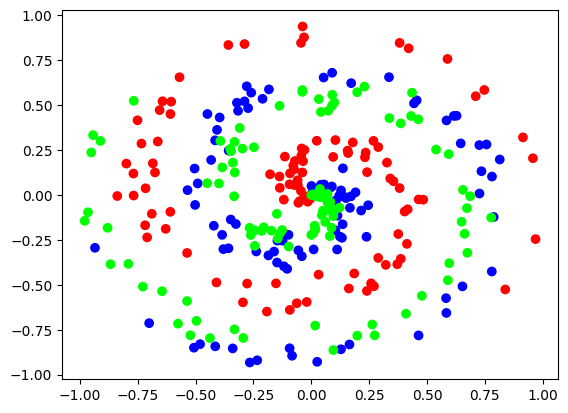

In [11]:
from nnfs.datasets import spiral_data
nnfs.init() # sets random seed to 0 
X, y = spiral_data(samples=100, classes=3) # X consists of coordinate pairs, y is classification - 
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

Note that when we're initialising this dataset, the 'samples' is not the total training examples - it's actually the number of each classification we'll have. So samples = 100, classes = 3 means 3 classes, each with 100 samples, so 300 total training examples 

In [12]:
class Layer_Dense: 
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons) # I think in this order we're actually doing the transpose of what we had before 
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs): 
        self.output = np.dot(inputs, self.weights) + self.biases
        return self.output

In [13]:
layer1 = Layer_Dense(2, 3)
print(layer1.weights)
print(X[:5])
layer1.forward(X)
layer1.output[:5]

[[-0.01306527  0.01658131 -0.00118164]
 [-0.00680178  0.00666383 -0.0046072 ]]
[[0.         0.        ]
 [0.00299556 0.00964661]
 [0.01288097 0.01556285]
 [0.02997479 0.0044481 ]
 [0.03931246 0.00932828]]


array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.0475188e-04,  1.1395361e-04, -4.7983500e-05],
       [-2.7414842e-04,  3.1729150e-04, -8.6921798e-05],
       [-4.2188365e-04,  5.2666257e-04, -5.5912682e-05],
       [-5.7707680e-04,  7.1401405e-04, -8.9430439e-05]], dtype=float32)

#### An Important Note on Random Number Generation
When we set the seed to 0, this ensures reproducibility. However, let's say [1] defines the seed, and then [2] generates a random number. If you continue to just run [2], the random number will actually be different every time. However, if you run [1] then [2] (e.g., by restarting the kernel) then you will always get the same number. 

In [14]:
np.random.seed(2)

In [15]:
np.random.rand(2,3)

array([[0.4359949 , 0.02592623, 0.54966248],
       [0.43532239, 0.4203678 , 0.33033482]])

#### Adding in the ReLU 

In [16]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        return self.output
activation1 = Activation_ReLU()
activation1.forward(layer1.output)[:5] # Alternatively, could do Activation_ReLU().forward(layer1.output)[:5]

array([[0.        , 0.        , 0.        ],
       [0.        , 0.00011395, 0.        ],
       [0.        , 0.00031729, 0.        ],
       [0.        , 0.00052666, 0.        ],
       [0.        , 0.00071401, 0.        ]], dtype=float32)

#### Adding in the Softmax

In [17]:
test = layer1.output[:5]
test

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.0475188e-04,  1.1395361e-04, -4.7983500e-05],
       [-2.7414842e-04,  3.1729150e-04, -8.6921798e-05],
       [-4.2188365e-04,  5.2666257e-04, -5.5912682e-05],
       [-5.7707680e-04,  7.1401405e-04, -8.9430439e-05]], dtype=float32)

In [18]:
np.exp(test) / np.array([np.sum(np.exp(test), axis=1)]).T

array([[0.33333334, 0.33333334, 0.33333334],
       [0.3333027 , 0.3333756 , 0.33332166],
       [0.33324683, 0.333444  , 0.33330923],
       [0.3331873 , 0.33350348, 0.33330923],
       [0.3331357 , 0.3335661 , 0.33329818]], dtype=float32)

In [19]:
outputs = np.exp(test) / np.sum(np.exp(test), axis=1, keepdims=True)
outputs

array([[0.33333334, 0.33333334, 0.33333334],
       [0.3333027 , 0.3333756 , 0.33332166],
       [0.33324683, 0.333444  , 0.33330923],
       [0.3331873 , 0.33350348, 0.33330923],
       [0.3331357 , 0.3335661 , 0.33329818]], dtype=float32)

Note what the keepdims command does here. If we didn't have it, the output would be a (5,) array which would not be able to be divided Think of 0 axis as an arrow that goes down, so we're taking vertical slices and adding up, hence summing the columns. Think of axis 1 as going across, so we're taking horizontal slices and adding up, hence summing the rows 

In [20]:
np.sum(np.exp(test), axis=1, keepdims=True)

array([[3.       ],
       [2.9999614],
       [2.9999561],
       [3.0000489],
       [3.000048 ]], dtype=float32)

In [21]:
class Activation_Softmax:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.exp(inputs) / np.sum(np.exp(inputs), axis=1, keepdims=True) #This keepdims=True command is SUPER USEFUL!
        return self.output
activation1 = Activation_Softmax()
activation1.forward(layer1.output)[:5] # Alternatively, could do Activation_Softmax().forward(layer1.output)[:5]

array([[0.33333334, 0.33333334, 0.33333334],
       [0.3333027 , 0.3333756 , 0.33332166],
       [0.33324683, 0.333444  , 0.33330923],
       [0.3331873 , 0.33350348, 0.33330923],
       [0.3331357 , 0.3335661 , 0.33329818]], dtype=float32)

In [22]:
layer1.output[:5]

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.0475188e-04,  1.1395361e-04, -4.7983500e-05],
       [-2.7414842e-04,  3.1729150e-04, -8.6921798e-05],
       [-4.2188365e-04,  5.2666257e-04, -5.5912682e-05],
       [-5.7707680e-04,  7.1401405e-04, -8.9430439e-05]], dtype=float32)

In [23]:
X[:5]

array([[0.        , 0.        ],
       [0.00299556, 0.00964661],
       [0.01288097, 0.01556285],
       [0.02997479, 0.0044481 ],
       [0.03931246, 0.00932828]], dtype=float32)

In [24]:
layer1.weights

array([[-0.01306527,  0.01658131, -0.00118164],
       [-0.00680178,  0.00666383, -0.0046072 ]], dtype=float32)

In [25]:
p = np.dot(X[:5], layer1.weights)

In [26]:
softmax1 = Activation_Softmax()
m = softmax1.forward(p)
m

array([[0.33333334, 0.33333334, 0.33333334],
       [0.3333027 , 0.3333756 , 0.33332166],
       [0.33324683, 0.333444  , 0.33330923],
       [0.3331873 , 0.33350348, 0.33330923],
       [0.3331357 , 0.3335661 , 0.33329818]], dtype=float32)

In [27]:
np.sum(np.log(m), axis=1)

array([-3.295837 , -3.295837 , -3.2958367, -3.2958372, -3.2958374],
      dtype=float32)

In [28]:
test_results = np.array([[0,0,1], [1,0,0], [1,0,0], [0,1,0], [0,0,1]])
test_results

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [29]:
m*test_results

array([[0.        , 0.        , 0.33333334],
       [0.33330271, 0.        , 0.        ],
       [0.33324683, 0.        , 0.        ],
       [0.        , 0.33350348, 0.        ],
       [0.        , 0.        , 0.33329818]])

#### A Quick Note on some of the Categorical Cross Entropy Code
When we have the line confidence_values = clipped_pred[range(len(clipped_pred)), y_true], look at the example directly below this:
Basically we're indexing a matrix using 2 arrays - so essentiall we'll take the first element of each row (range(len(y_pred)) will give us the row corresponding to each sample, and then each entry in y_true will give us the correct column. But note that this is done element-wise

In [30]:
y_pred = np.random.randint(low=0, high=20, size=(5, 4)) # let's just pretend that these would all add to 1 (after softmax)
y_true = [1,2,3,2,1]
print(f'y_pred: {y_pred}')
print(f'y_true: {y_true}')
print(y_pred[range(len(y_pred)), y_true])

y_pred: [[11 15  5  7]
 [ 3  6  4 10]
 [11 19  7  6]
 [10  1  3  5]
 [ 4 14  6 19]]
y_true: [1, 2, 3, 2, 1]
[15  4  6  3 14]


In [31]:
class Loss: 
    def calculate(self, predictions, results):
        sample_losses = self.forward(predictions, results)
        data_loss = np.mean(sample_losses)
        return data_loss
class Categorical_Cross_Entropy_Loss(Loss):
    def forward(self, y_pred, y_true):
        """
        A few things to keep in mind - numpy multiplication is element-wise - so this multiplies 
        the log of the prediction by each outcome, then adds them up row-wise to get an array containing
        the loss per example, and the mean is then taken to compute the average loss over the training batch (now removed and #'d)
        
        """
        clipped_pred = np.clip(y_pred, 1e-7, 1 - 1e-7) # this ensures no y-values are 0 (or 1), preventing log(0) 
        if len(y_true.shape) == 1: # if true, we're dealing with sparse, not 1-hot encoded values
            confidence_values = clipped_pred[range(len(clipped_pred)), y_true] # E.g., if y_true = 2 (class 2) then we only take the log of index 2 in prediction
        else:
            confidence_values = np.sum(clipped_pred * y_true, axis=1)
        negative_log_likelihoods = -np.log(confidence_values)
        return negative_log_likelihoods
        # return np.mean(np.sum(np.log(y_pred) * y_true, axis=1, keepdims=True)) does everything together without superclass     

In [32]:
loss_function = Categorical_Cross_Entropy_Loss()
loss = loss_function.calculate(activation1.output, y)
loss

1.098465

In [33]:
a = np.array([[0.5, 0.2, 0.3], [0.2, 0.1, 0.7], [0.3, 0.5, 0.2]])
b = np.array([2, 0, 1])
c = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]])

In [34]:
class Accuracy:
    def calculate_accuracy(self, predictions, values):
        predicted_argmaxes = np.argmax(predictions, axis=1)
        if len(values.shape) == 2: 
            value_argmaxes = np.argmax(values, axis=1)
            return np.mean(predicted_argmaxes == value_argmaxes)
        else:
            return np.mean(predicted_argmaxes == values)
check = Accuracy()
check.calculate_accuracy(a, c)

0.3333333333333333

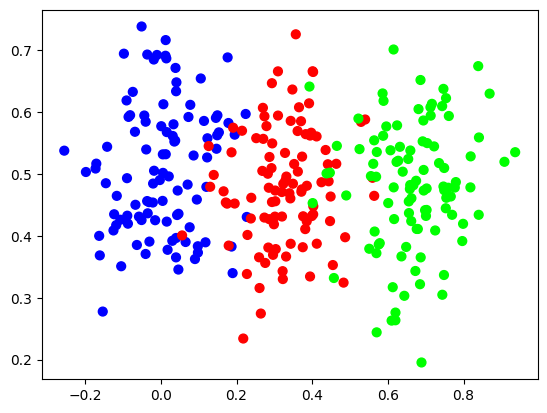

In [35]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [36]:
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()
loss_function = Categorical_Cross_Entropy_Loss()
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
lowest_loss = 99999
for iteration in range(20000):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    loss = loss_function.calculate(activation2.output, y)
    if loss <= lowest_loss:
        lowest_loss = loss
        best_dense1_weights = dense1.weights
        best_dense1_biases = dense1.biases
        best_dense2_weights = dense2.weights
        best_dense2_biases = dense2.biases
        print(lowest_loss)
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)

1.0986103
1.098138
1.0980115
1.0977516
1.097571
1.0974693
1.0968257
1.0965533
1.0964499
1.0964295
1.0963014
1.0959858


### An Important Note on the Use of .copy()
If we look at the code below, what are we doing: we first initialise the Layer_Dense classes, so we give dense1.weights etc. an initial value. 
Then we initialise the 'best_dense1_weights' to these values, with the hope of choosing new dense1.weights that yield a lower loss, and then 
replacing best_dense1_weights with these better values. When we initialise dense1.weights, this will point to some numpy array in memory - and when
we initialise best_dense1_weights as dense1.weights, these will point to the **same object** in memory. Now, if we change the value of dense1.weights,
e.g., **reassign** it to a new value in memory, best_dense1_weights actually still points to the **initial value**. Then, let's say we find a better
value of dense1.weights (with lower loss), we set best_dense1_weights to dense1.weights, so they are pointing to the same 'best' value so far. Then,
when we create another random value of dense1.weights for the next iteration (top of for loop), best_dense1_weights will **still retain** the previous
best value because this new dense1.weights will just be assigned to a different part of memory. 

This is what happens when we **reassign** variables to a new value: If we have x = 5, that points to 5 in memory, y = x, that y just points to the **value** of 5 in memory, not to 'x'. Because if we then do x = 6, and print(y), y = 5 still. This is because **integers are immutable**. So where does
the issue arise? If we **directly** mutate the variable, such as a list. For example: 
x = [1,2,3]
y = x 
x.append(4)
This **directly mutates the object in memory**, so y is now also [1,2,3,4]
If we want to mutate the value of the variable, without changing any other variable that is equal to it, we set y = x.copy()

In the example below, when we change dense1.weights, we are **reassigning it** - dense1.weights = np.random.randn(2,3)
**However**, in the next example, we will actually be setting dense1.weights += np.random.randn(2,3), which **mutates** it, so to prevent
best_dense1_weights from just taking on a new random value every time (i.e., not **saving** the best value), we need the .copy() method. 

In [37]:
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
X, y = vertical_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Categorical_Cross_Entropy_Loss()
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights
best_dense1_biases = dense1.biases
best_dense2_weights = dense2.weights
best_dense2_biases = dense2.biases
for iteration in range(10000):
    # Generate a new set of weights for iteration
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)
    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
        'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights
        best_dense1_biases = dense1.biases
        best_dense2_weights = dense2.weights
        best_dense2_biases = dense2.biases
        lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.0986564 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.098138 acc: 0.3333333333333333
New set of weights found, iteration: 117 loss: 1.0980115 acc: 0.3333333333333333
New set of weights found, iteration: 124 loss: 1.0977516 acc: 0.6
New set of weights found, iteration: 165 loss: 1.097571 acc: 0.3333333333333333
New set of weights found, iteration: 552 loss: 1.0974693 acc: 0.34
New set of weights found, iteration: 778 loss: 1.0968257 acc: 0.3333333333333333
New set of weights found, iteration: 4307 loss: 1.0965533 acc: 0.3333333333333333
New set of weights found, iteration: 4615 loss: 1.0964499 acc: 0.3333333333333333
New set of weights found, iteration: 9450 loss: 1.0964295 acc: 0.3333333333333333


In [38]:
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
X, y = vertical_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Categorical_Cross_Entropy_Loss()
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
for iteration in range(10000):
    # Generate a new set of weights for iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
        'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    #else:
        #dense1.weights = best_dense1_weights.copy()
        #dense1.biases = best_dense1_biases.copy()
        #dense2.weights = best_dense2_weights.copy()
        #dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.0987684 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0987465 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0952812 acc: 0.47333333333333333
New set of weights found, iteration: 26 loss: 1.0843157 acc: 0.53
New set of weights found, iteration: 233 loss: 1.0715835 acc: 0.37
New set of weights found, iteration: 1599 loss: 0.9719525 acc: 0.4166666666666667
New set of weights found, iteration: 1602 loss: 0.91105044 acc: 0.5533333333333333
New set of weights found, iteration: 1630 loss: 0.9102432 acc: 0.5
New set of weights found, iteration: 1631 loss: 0.91012657 acc: 0.58
New set of weights found, iteration: 1632 loss: 0.90975446 acc: 0.7133333333333334
New set of weights found, iteration: 1634 loss: 0.905592 acc: 0.43


C:\Users\plfra\AppData\Local\Temp\ipykernel_22592\3927445944.py:4: RuntimeWarning: overflow encountered in exp
  self.output = np.exp(inputs) / np.sum(np.exp(inputs), axis=1, keepdims=True) #This keepdims=True command is SUPER USEFUL!
C:\Users\plfra\AppData\Local\Temp\ipykernel_22592\3927445944.py:4: RuntimeWarning: invalid value encountered in divide
  self.output = np.exp(inputs) / np.sum(np.exp(inputs), axis=1, keepdims=True) #This keepdims=True command is SUPER USEFUL!


In [39]:
i = np.array([[2, 3, 4], [1,2,3]], dtype='float64')
j = i 
i += np.random.randn(2,3)
print(i)
print(j)

[[1.70093304 1.60835063 3.45059323]
 [2.00346494 1.867483   1.97238326]]
[[1.70093304 1.60835063 3.45059323]
 [2.00346494 1.867483   1.97238326]]


In [40]:
test = dense1.weights 
print(test)
for i in range(10000):
    test += 0.05*np.random.randn(2,3)
print(test)

[[-4.105238   4.8877683  0.6131243]
 [ 6.1118307 -3.7051685  7.3786573]]
[[-8.854751  -1.3563383 -1.5613705]
 [ 7.2045183 -1.9242702  3.738915 ]]


New set of weights found, iteration: 0, loss: 1.0987683534622192, acc: 0.3333333333333333
iteration 0:
first average softmax input: -0.007824373431503773
New set of weights found, iteration: 1, loss: 1.0987465381622314, acc: 0.3333333333333333
iteration 1:
first average softmax input: 0.0009615086019039154
New set of weights found, iteration: 10, loss: 1.0952812433242798, acc: 0.47333333333333333
iteration 10:
first average softmax input: -0.04438886418938637
New set of weights found, iteration: 26, loss: 1.0843156576156616, acc: 0.53
iteration 26:
first average softmax input: 0.23515935242176056
New set of weights found, iteration: 233, loss: 1.0715835094451904, acc: 0.37
iteration 233:
first average softmax input: -0.3054382801055908
New set of weights found, iteration: 1599, loss: 0.971952497959137, acc: 0.4166666666666667
iteration 1599:
first average softmax input: -2.2259180545806885
New set of weights found, iteration: 1602, loss: 0.9110504388809204, acc: 0.5533333333333333
iter

C:\Users\plfra\AppData\Local\Temp\ipykernel_22592\3927445944.py:4: RuntimeWarning: overflow encountered in exp
  self.output = np.exp(inputs) / np.sum(np.exp(inputs), axis=1, keepdims=True) #This keepdims=True command is SUPER USEFUL!
C:\Users\plfra\AppData\Local\Temp\ipykernel_22592\3927445944.py:4: RuntimeWarning: invalid value encountered in divide
  self.output = np.exp(inputs) / np.sum(np.exp(inputs), axis=1, keepdims=True) #This keepdims=True command is SUPER USEFUL!


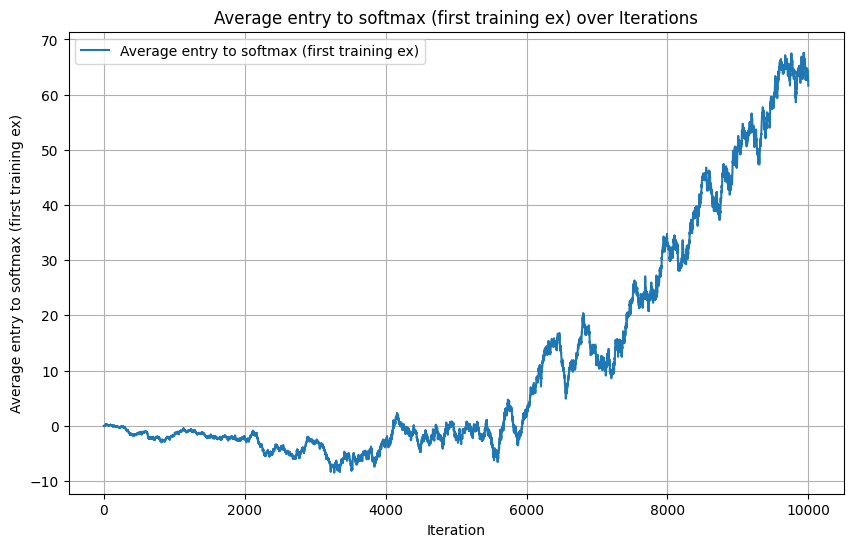

In [41]:
import nnfs
from nnfs.datasets import vertical_data
import numpy as np

nnfs.init()
X, y = vertical_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Categorical_Cross_Entropy_Loss()

# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

first_entry_values = []

for iteration in range(10000):
    # Generate a new set of weights for iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    first_entry_values.append(np.mean(activation2.inputs[0]))

    #print(f'dense1 weights: {dense1.weights}') 
    #print(f'best dense1 weights: {best_dense1_weights}') 
    
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print(f'New set of weights found, iteration: {iteration}, loss: {loss}, acc: {accuracy}')
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
        print(f'iteration {iteration}:')
        print(f'first average softmax input: {np.mean(activation2.inputs[0])}')
    # else:
    #     dense1.weights = best_dense1_weights.copy()
    #     dense1.biases = best_dense1_biases.copy()
    #     dense2.weights = best_dense2_weights.copy()
    #     dense2.biases = best_dense2_biases.copy()
plt.figure(figsize=(10, 6))
plt.plot(range(10000), first_entry_values, label='Average entry to softmax (first training ex)')
plt.xlabel('Iteration')
plt.ylabel('Average entry to softmax (first training ex)')
plt.title('Average entry to softmax (first training ex) over Iterations')
plt.legend()
plt.grid(True)
plt.show()

### Exploding Gradients...Sort of?
The above example shows that when we update the biases randomly but 'iteratively', i.e., by 'adding' a new random matrix rather than randomly 
initialising nwq matrices altogether, seems to show that we get exploding values. In the example above, regardless of whether the new weights
achieved are better, we always 'add' this new matrix. So we're adding 10,000 times over, essentially a random (3,2) matrix every time. It appears
that by the time we get to the softmax function, though (where we're exponentiating), things get a little out of control. However, when we add some code
to make it so that if we don't get a better loss, we just keep the previous best weights, then what this should mean is that we change the weights far
less often, so they don't explode out of control. Also, if we change things to += 0.005 * np.random.randn() then the weights get bigger, but nowhere near to the same extent

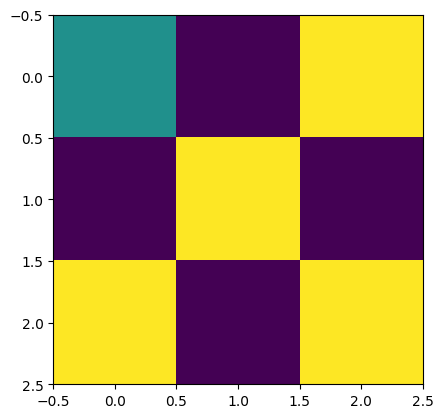

In [42]:
array_1 = np.array([[2,1,3],[1,3,1],[3,1,3]])
plt.imshow(array_1)


In [43]:
pow(200,-0.5)

0.07071067811865475

In [44]:
array_1 = np.array([[1,1],[2,2]])
cumulative_result = array_1
for i in range(3):
    cumulative_result = np.dot(cumulative_result, array_1)
cumulative_result

array([[27., 27.],
       [54., 54.]], dtype=float32)

In [45]:
np.dot(array_1, array_1)

array([[3., 3.],
       [6., 6.]], dtype=float32)

In [46]:
np.dot(array_1, np.array([[3., 3.],
       [6., 6.]], dtype='float32'))

array([[ 9.,  9.],
       [18., 18.]], dtype=float32)

In [47]:
np.dot(array_1, np.array([[ 9.,  9.],
       [18., 18.]], dtype='float32'))

array([[27., 27.],
       [54., 54.]], dtype=float32)


This <em> amazing</em> formatting was done by setting the cell to <font color = "red">markdown</font> rather than code.

### Backpropagation (1 Output Neuron)

In [48]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias
# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
# ReLU activation function
y = max(z, 0)
# Backward pass
# The derivative from the next layer - we're setting it as 1 so we can keep using the 'cumulative multiplication of the gradient' from layer to layer
dvalue = 1.0
# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)

# Partial derivatives of the multiplication, the chain rule
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db
print(drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)

# Partial derivatives of the multiplication, the chain rule
dmul_dx0 = w[0]
dmul_dx1 = w[1]
dmul_dx2 = w[2]
dmul_dw0 = x[0]
dmul_dw1 = x[1]
dmul_dw2 = x[2]
drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0
drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1
drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2

print(drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)
drelu_dx0 = dvalue * (1. if z > 0 else 0.) * w[0]
print(drelu_dx0)

1.0
1.0 1.0 1.0 1.0
-3.0 1.0 -1.0 -2.0 2.0 3.0
-3.0


Given that $z = \text{ReLU}(w_0x_0 + w_1x_1 + w_2x_2 + b)$, the derivative $\frac{dz}{dx_0}$ will be $\frac{dz}{d(\text{ReLU})}$ (which is 1 if the input is greater than 0) multiplied by $\frac{d(\text{ReLU})}{dx_0}$. We've just calculated that $\frac{d(\text{ReLU})}{dx_0}$ is simply $w_0$.
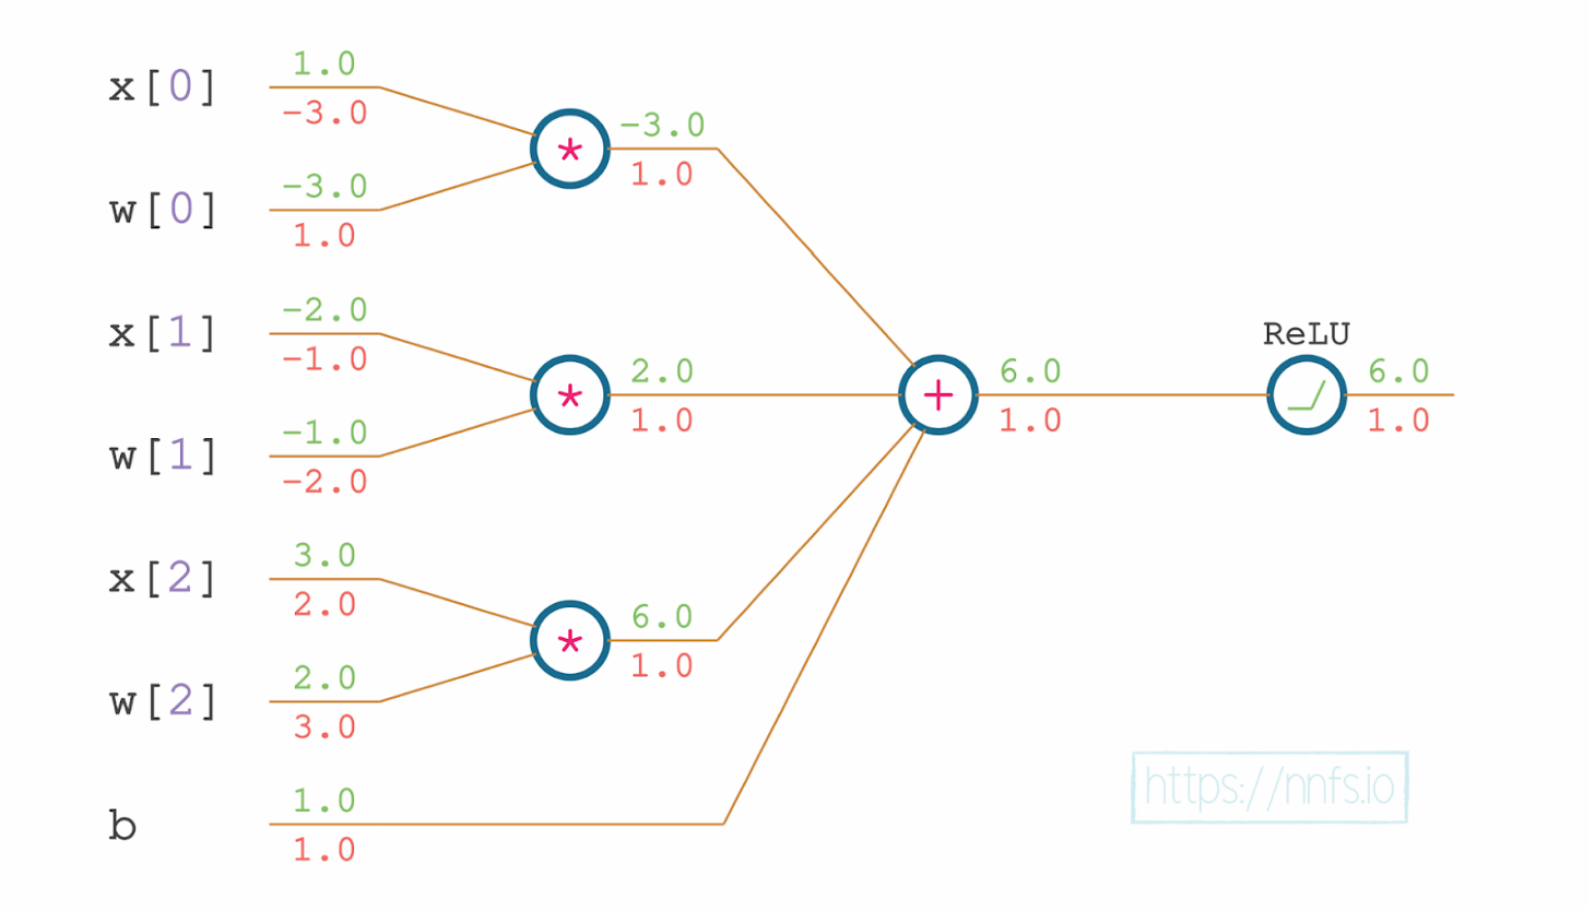

In [49]:
dx = [drelu_dx0, drelu_dx1, drelu_dx2]
dw = [drelu_dw0, drelu_dw1, drelu_dw2]
db = drelu_db
print(w, b)
w[0] += 0.001 * dw[0]
w[1] += 0.001 * dw[1]
w[2] += 0.001 * dw[2]
print(w)

[-3.0, -1.0, 2.0] 1.0
[-2.999, -1.002, 2.003]


### More Complex Example
There are 4 neurons in the 'hidden layer' ($x_0$, $x_1$, $x_2$, $x_3$) and 3 in the 'output' layer ($y_1$, $y_2$, $y_3$). After that, we have activation functions, loss functions, etc., but those are not that important for now. What we want to do is figure out the change in loss with respect to the inputs (nodes) in the hidden layer, assuming that we already know the gradients of the output layer nodes. This will form the basis for the recursive part of the algorithm.

Assume we know $\frac{\partial L}{\partial y_1}$, $\frac{\partial L}{\partial y_2}$, and $\frac{\partial L}{\partial y_3}$ from the 'previous backward pass'. If we want to find $\frac{\partial L}{\partial x_0}$, we actually need: $\frac{\partial L}{\partial x_0} = \frac{\partial L}{\partial y_1} \cdot \frac{\partial y_1}{\partial x_0} + \frac{\partial L}{\partial y_2} \cdot \frac{\partial y_2}{\partial x_0} + \frac{\partial L}{\partial y_3} \cdot \frac{\partial y_3}{\partial x_0}
$ since $x_0$ connects to all 3 neurons in the final layer.
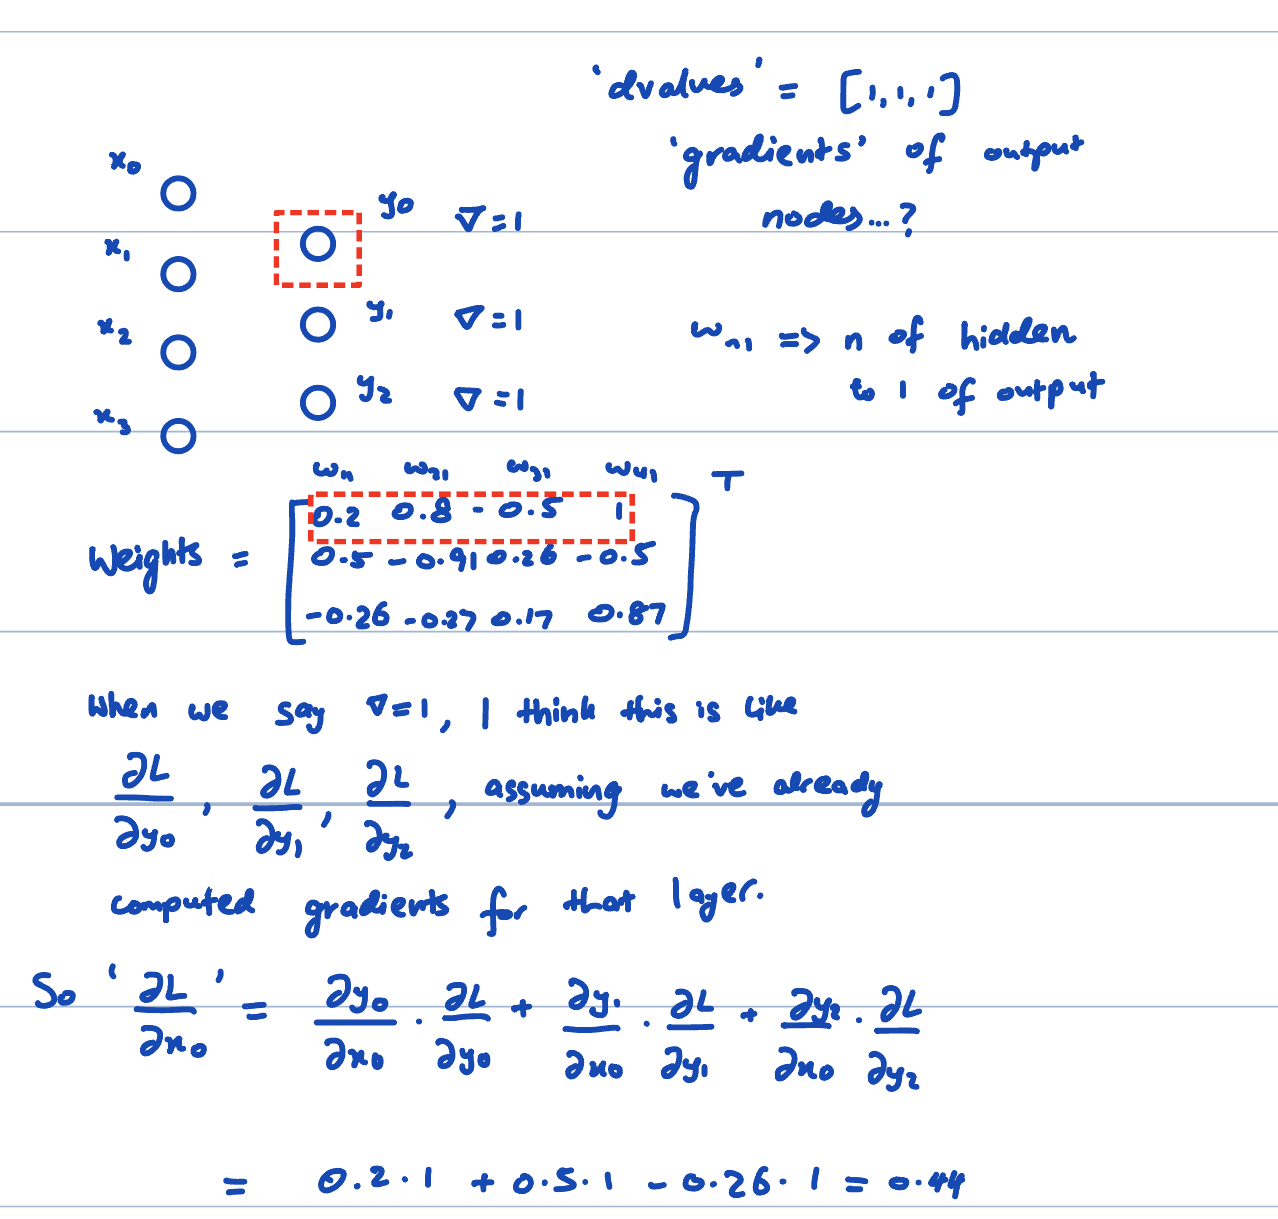
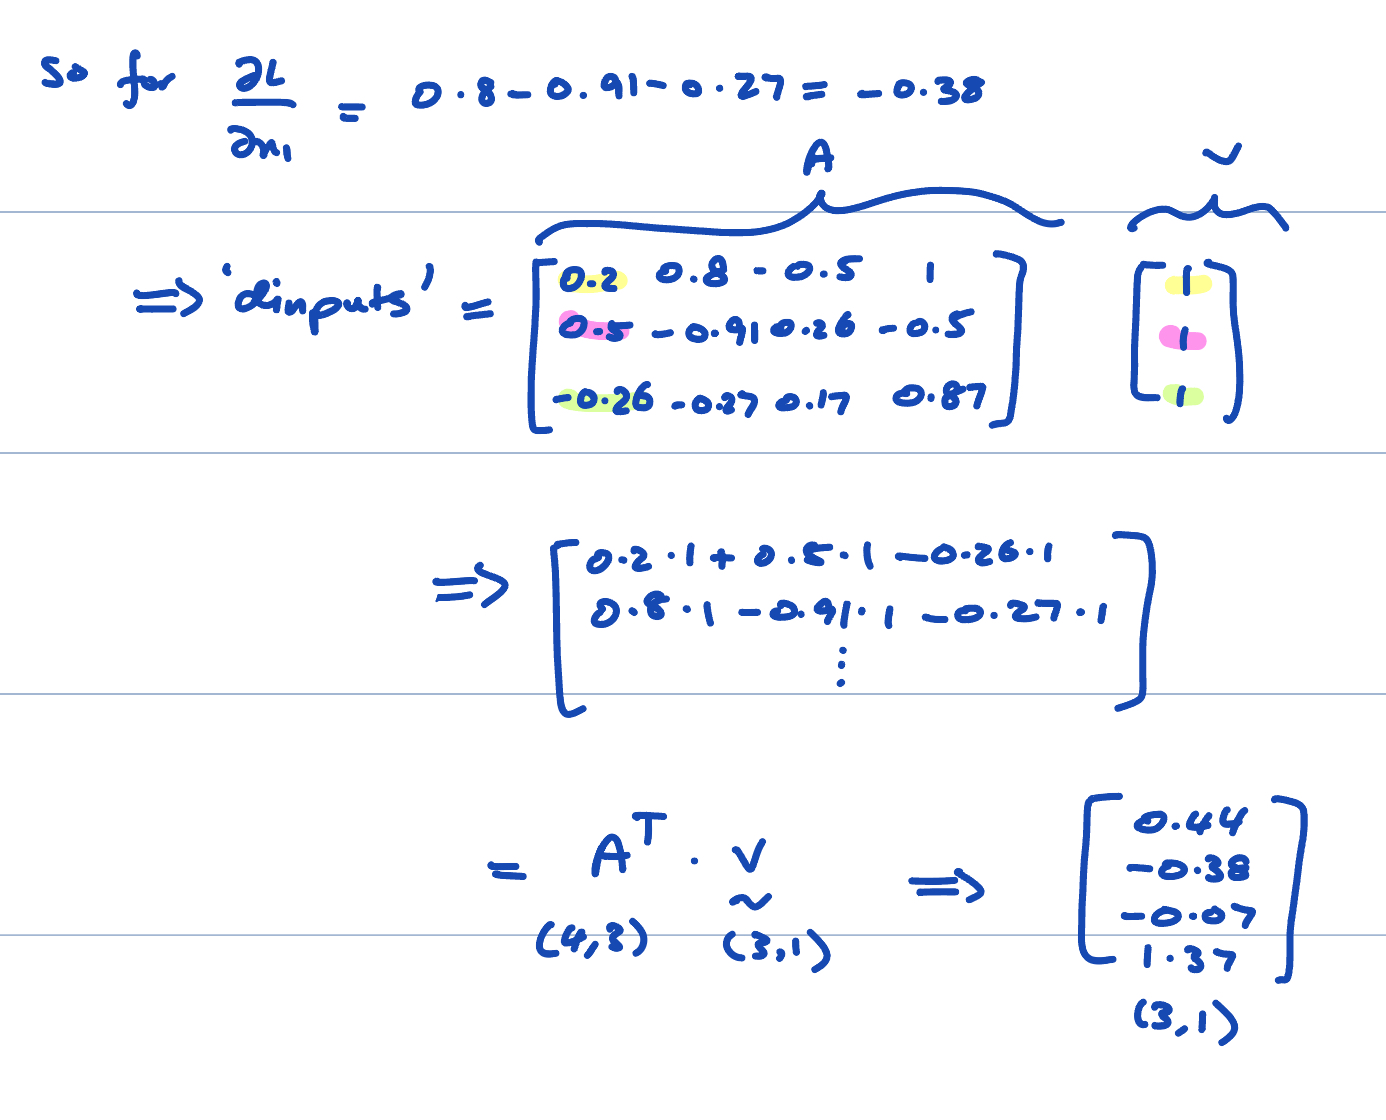

In [50]:
import numpy as np
# Passed in gradient from the next layer
# for the purpose of this example we're going to use
# a vector of 1s
dvalues = np.array([[1., 1., 1.]]) # I'm assuming this is the 'gradients' of the layer, like the dL/dy1, dL/dy2, dL/dy3 - each time we backprop a layer these should be given to us 
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]]).T
# sum weights of given input
# and multiply by the passed in gradient for this neuron
dx0 = sum(weights[0])*dvalues[0] # this is summing across each row 
dx1 = sum(weights[1])*dvalues[0]
dx2 = sum(weights[2])*dvalues[0]
dx3 = sum(weights[3])*dvalues[0]
dinputs = np.array([dx0, dx1, dx2, dx3]) # this '[ 0.44 -0.38 -0.07 1.37]' is the equivalent of our '[1,1,1]' from before - represents our 'dL/dx0, dL/dx1' etc.
print(dinputs)

[[ 0.44  0.44  0.44]
 [-0.38 -0.38 -0.38]
 [-0.07 -0.07 -0.07]
 [ 1.37  1.37  1.37]]


#### More Succinct way of Writing, Using Matrix Product

In [51]:
# Passed in gradient from the next layer
# for the purpose of this example we're going to use
# a vector of 1s
dvalues = np.array([[1., 1., 1.]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]]).T
# sum weights of given input
# and multiply by the passed in gradient for this neuron
dinputs = np.dot(dvalues[0], weights.T)
print(dinputs)

[ 0.44 -0.38 -0.07  1.37]


#### Handling Batches (i.e., computing gradients from multiple samples)
By the way, if you look at how I've handwritten the example in the diagram above, I've done np.dot($A^T, \text{dvalues}^T$) but they've done np.dot($\text{dvalues}, A$), where $A$ is defined above (abusive notation 🗿) - this is why the results look like the transposes of each other $(AB)^T = (B^T A^T)$ - I get a column vector they get a row vector. 

I assume that **in the end**, what we will actually have, will be just a final row vector, which will be computing the sum of the gradients of each input over **all of the samples** - if we have 4 inputs in our layer, then of course our final result should contain 4 neurons in a row vector, so we should probably be summing along axis=0 at the end, in order to find the aggregated sum of all these gradients for each input

In [52]:
dvalues = np.array([[1., 1., 1.],[2., 2., 2.],[3., 3., 3.]])
weights = np.array([[0.2, 0.8, -0.5, 1],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]]).T
# sum weights of given input
# and multiply by the passed in gradient for this neuron
dinputs = np.dot(dvalues, weights.T)
print(dinputs)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


#### Computing the Gradients of the Weights
This is a little bit more tricky, and requires a little bit more of a derivation, since the textbook does not make things abundantly clear. 
We eventually want to find $\frac{\partial L}{\partial W}$, where $W$ is a matrix of weights, but we want this to be over the **batch of training examples**, which is less simple. Let's consider the following neural network structure as it is below:

Add a diagram demonstrating how the weights are calculated

In [53]:
dvalues_1_sample = np.array([[1,1,1]])
inputs_1_sample = np.array([[1,2,3,2.5]])
dweights_1_sample = np.array([[1, 2, 3, 2.5], [1, 2, 3, 2.5], [1,2,3,2.5]])
dweights_1_sample = np.dot(dvalues_1_sample.T, inputs_1_sample)

dvalues_2_sample = np.array([[2,2,2]])
inputs_2_sample = np.array([[2,5,-1,2]])
dweights_2_sample = np.dot(dvalues_2_sample.T, inputs_2_sample)

dvalues_3_sample = np.array([[3,3,3]])
inputs_3_sample = np.array([[-1.5, 2.7, 3.3, -0.8]])
dweights_3_sample = np.dot(dvalues_3_sample.T, inputs_3_sample)

print(dweights_1_sample)
print(dweights_2_sample)
print(dweights_3_sample)
print(dweights_1_sample + dweights_2_sample + dweights_3_sample)

[[1.  2.  3.  2.5]
 [1.  2.  3.  2.5]
 [1.  2.  3.  2.5]]
[[ 4. 10. -2.  4.]
 [ 4. 10. -2.  4.]
 [ 4. 10. -2.  4.]]
[[-4.5  8.1  9.9 -2.4]
 [-4.5  8.1  9.9 -2.4]
 [-4.5  8.1  9.9 -2.4]]
[[ 0.5 20.1 10.9  4.1]
 [ 0.5 20.1 10.9  4.1]
 [ 0.5 20.1 10.9  4.1]]


In [54]:
dvalues = np.array([[1., 1., 1.],
[2., 2., 2.],
[3., 3., 3.]])
# We have 3 sets of inputs - samples
inputs = np.array([[1, 2, 3, 2.5],
[2., 5., -1., 2],
[-1.5, 2.7, 3.3, -0.8]])
# sum weights of given input
# and multiply by the passed in gradient for this neuron
dweights = np.dot(inputs.T, dvalues)
print(dweights)

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


**Note** for above calculation: for some reason, the textbook likes to keep the weights transposed. What I am more use to is 4 input neurons, 3 outputs, so the shape would be $(3,4)$, with the first row containing $w_{1,1},w_{2,1},w_{3,1}, w_{4,1}$. But alas. In this calculation above, we would have in the first row $w_{1,1}, w_{1,2}, w_{1,3}$ and the other rows will follow a similar fashion

#### Computing the Gradients of the Biases
So in this context we would be looking to calculate $\frac{\partial L}{\partial b_1}, \frac{\partial L}{\partial b_2}, \frac{\partial L}{\partial b_3}$, since we have 3 output neurons - since the outputs are calculated in the form $y = aX + b$, we just have $\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial \text{values}} \frac{\partial \text{values}}{\partial b_1}$, where $\frac{\partial \text{values}}{\partial b_1}$ will always equal 1, and $\frac{\partial L}{\partial \text{values}}$ will be given from the previous layer.  Hence, for a batch of 3 samples, with 3 outputs, we compute the gradients of the biases as follows: 

In [55]:
dvalues = np.array([[1., 1., 1.],
[2., 2., 2.],
[3., 3., 3.]])
biases = np.array([[2, 3, 0.5]])
dvalues_dbiases = np.array([[1,1,1], [1,1,1], [1,1,1]]) # this is redundant, but written for illustrative purposes
dbiases_over_samples = dvalues * dvalues_dbiases # each row contains the bias vector gradient, which is then summed over the batch 
dbiases = np.sum(dbiases_over_samples, axis=0, keepdims=True)
dbiases

array([[6., 6., 6.]])

#### Adding the ReLU function to compute the gradients of the previous layer inputs
**Note:** This is given that we know $\frac{\partial L}{\partial \text{values}}$, where dvalues refers to the derivative of the loss function with respect to the 'next layer forward' **after the activation function**. This is important because what we had before, when calculating dinputs was not entirely correct. We want $\frac{\partial L}{\partial \text{inputs}}$, where inputs is the 'current' layer, given that we have the gradients of the **next** layer. However, instead of weights * dvalues, we actually need to do dvalues * activation gradient * weights. In terms of the chain rule, this would be $\frac{\partial L}{\partial \text{inputs}} = \frac{\partial L}{\partial \text{values}} \frac{\partial \text{values}}{\partial \text{unactivated}} \frac{\partial \text{unactivated}}{\partial \text{inputs}}$. So the first term we've got given, the second term will be the derivative of the ReLU, and the third term will be the weights matrix like before. 

What do we need to calculate: When we calculate layer_outputs (just $wX+b$), we then put that through the ReLU, and we want to find the derivative of that, with respect to layer_outputs. The derivative will be the **same shape** as layer_outputs, but will just be 0s or 1s, depending on if the values in layer_outputs were positive or negative. These 0s and 1s will *then* be multiplied by the **dvalues** (i.e., the gradients of the next layer). This is so so crucial - I'm pretty sure in the textbook, they make a small error on page 208, with the following code: drelu = relu_outputs.copy(). I think it should be dvalues.copy(). 

**Important Note:** 
We **need** to multiply by the derivative of the ReLU function for **ALL** of the derivative calculations - i.e., dinputs, dweights, and dbiases! This should make sense because we have dL/da (dvalues), and a = ReLU(weights * inputs + biases) - so it should make sense that when we do da/dW or da/dX that we need to take into account this ReLU. 

Anyway, I think this is the most simplified code to compute the derivatives with respect to the inputs:

In [56]:
import numpy as np

# Given data
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])
inputs = np.array([[1, 2, 3, 2.5],
                   [2., 5., -1., 2],
                   [-1.5, 2.7, 3.3, -0.8]])
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T
biases = np.array([[2, 3, 0.5]])

# Forward pass: calculate the output of the layer and apply ReLU
layer_outputs = np.dot(inputs, weights) + biases
relu_outputs = np.maximum(0, layer_outputs)

# Backward pass
# The gradient of ReLU function for the forward pass output
relu_derivative = relu_outputs > 0  # ReLU derivative is 1 for positive, 0 for non-positive

# Gradient on values passed through ReLU (dvalues) - this is element-wise multiplication
dvalues_relu = dvalues * relu_derivative

# Gradient on inputs
dinputs = np.dot(dvalues_relu, weights.T) # dvalues_relu is basically the dL/da * da/dz (if a is dvalues, z is layer_outputs) 

# Gradient on weights
dweights = np.dot(inputs.T, dvalues_relu)

# Gradient on biases - summed gradients for each bias
dbiases = np.sum(dvalues_relu, axis=0, keepdims=True)

dinputs, dweights, dbiases

(array([[ 0.44, -0.38, -0.07,  1.37],
        [-0.12,  1.06, -0.66,  3.74],
        [ 1.32, -1.14, -0.21,  4.11]], dtype=float32),
 array([[ 0.5, -3.5,  0.5],
        [20.1, 10.1, 20.1],
        [10.9, 12.9, 10.9],
        [ 4.1,  0.1,  4.1]], dtype=float32),
 array([[6., 4., 6.]]))

#### Integrating Backpropagation into the Model
Recall that at the start? we just had this code: 
But now notice at the bottom that we've added self.inputs = inputs. This is because we'll need this code in order to calculate the partial derivatives of the weights during backpropagation

In [57]:
class Layer_Dense:
# Layer initialization
    def __init__(self, inputs, neurons):
        self.weights = 0.01 * np.random.randn(inputs, neurons)
        self.biases = np.zeros((1, neurons))
        self.inputs = inputs
    # Forward pass
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

Now we'll add the backward method for Layer_Dense: 

In [58]:
class Layer_Dense:
# Layer initialization
    def __init__(self, inputs, neurons):
        self.weights = 0.01 * np.random.randn(inputs, neurons)
        self.biases = np.zeros((1, neurons))
        self.inputs = inputs
    # Forward pass
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
    # Backward pass
    def backward(self, dvalues): # When we propagate backwards, what we're actually using as 'dvalues' is gonna be the 'real' dvalues, multiplied by that self.dinputs from the ReLU backward method. 
        dweights = np.dot(self.inputs.T, dvalues)
        dbiases = np.sum(dvalues, axis=0, keepdims=True)
        dinputs = np.dot(dvalues, self.weights.T)

And the backward method for Activation_ReLU: 
We need to be careful with how we write this. Think about when we backpropagate - we're gonna be doing ReLU.backward before we do layer_dense.backward(). This is because we're going in **reverse order**. Now, if we look above at how we calculated the values of dweights, dinputs, and dbiases - they all used that dvalues_relu (or drelu in the textbook) - this is because we need to multiply not just by the gradients of the activated neurons, but one step before that is the derivative of the ReLU itself. 

So, if we look at the backward method for Activation_ReLU, that self.dinputs looks like our 'ReLU derivative' * dvalues (element-wise) - in the previous code, this is the equivalent of our 'dvalues_relu' that we then use in the formulas to calculate the gradients of the weights and biases. So, when we look at the Layer_Dense backward method, what that's actually gonna be is not just dvalues, but dvalues * ReLU derivative. And then we proceed with all the normal calculations. It's just that we get that dvalues * ReLU derivative from the ReLU backward method. Important Point:

**Important Point:** It appears that each time we're backpropagating a layer, like for example, with the backward method of ReLU, what we're trying to output is the 'most recent' or the 'most far back' derivative of the loss function, so that when we go back one step more, we're only multiplying 'one more derivative back'. So for example, when we do derivative of ReLU, what we're really getting is actually dL/dz, and we're getting that by taking in dL/da (the 'most recent' derivative), and then multiplying by 1 more derivative step, to get us to dL/dz. And then now, this becomes our 'dvalues' that we'd be inputting into our backward method for Layer_Dense. What this means is that each time we do a 'backward' method, **we're only going 1 derivative back at a time**

In [59]:
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
    # Backward pass
    def backward(self, dvalues): # Important! This is gonna be the 'actual' dvalues as input, i.e., the gradients we've been given. 
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0 # this is the same as doing relu_derivatives as a matrix of 1s and 0s, and element-wise multiply by dvalues - this gives us dL/dz

Or, if you prefer a ChatGPT explanation of the above concept: 
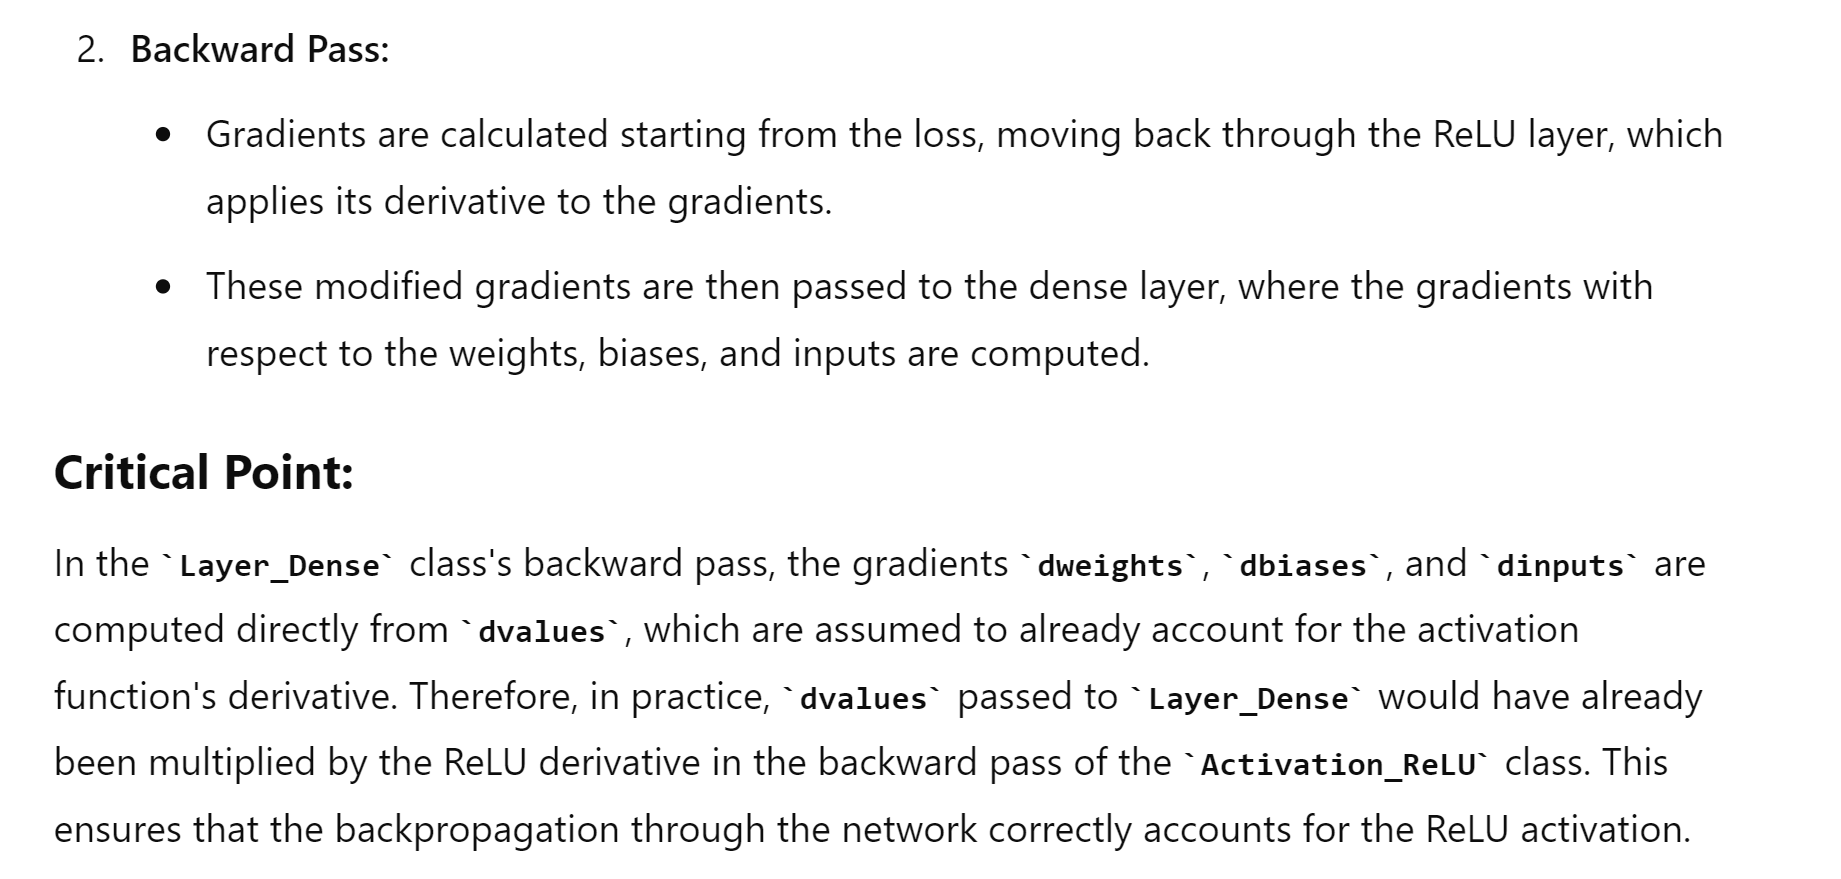

#### Categorical Cross-Entropy Loss Derivation
Let's first derive the mathematics. Recall that with each 'backward' method, we're only going '1 derivative back' - so in this context all we'd like to do is compute dL/dA, where L is the loss function, and A is the layer of activated neurons in the final layer (capital A in this context would indicate a **matrix**). So, let's assume for now that we have a vector of values, namely y_pred (denoted as $y$ below), which represent our 'true values'. We calculate the loss as follows: $$L=-\sum_{i=1}^{n}y_i\log(a_i), \Rightarrow \frac{\partial L}{\partial a_i} = -\frac{\partial}{\partial a_i}y_i\log(a_i) = -\frac{y_i}{a_i}$$
$$\therefore \frac{\partial L}{\partial a} = -[\frac{y_1}{a_1},\cdots, \frac{y_n}{a_n}]$$
And we can imagine for a batch, we would have the same thing, but just **more rows** for each sample 
So ideally, this should be all we need to return from the backward method of the Cross-Entropy Loss Function. Do recall also, though, that there is a little bit more to deal with in this context, simply because we have to take into account whether the true values are sparse or one-hot-encoded

### My Implementation Attempt
My implementation attempt manually constructs a one-hot-encoded vector in the case of a sparse 'y_true' matrix - nonetheless, the result is logically equivalent to using the faster np.eye() function, which I originally did not know about

In [60]:
class Loss: 
    def calculate(self, predictions, results):
        sample_losses = self.forward(predictions, results)
        data_loss = np.mean(sample_losses)
        return data_loss
class Categorical_Cross_Entropy_Loss(Loss):
    def forward(self, y_pred, y_true):
        """
        A few things to keep in mind - numpy multiplication is element-wise - so this multiplies 
        the log of the prediction by each outcome, then adds them up row-wise to get an array containing
        the loss per example, and the mean is then taken to compute the average loss over the training batch (now removed and #'d)
        
        """
        clipped_pred = np.clip(y_pred, 1e-7, 1 - 1e-7) # this ensures no y-values are 0 (or 1), preventing log(0) 
        if len(y_true.shape) == 1: # if true, we're dealing with sparse, not 1-hot encoded values
            confidence_values = clipped_pred[range(len(clipped_pred)), y_true] # E.g., if y_true = 2 (class 2) then we only take the log of index 2 in prediction
        else:
            confidence_values = np.sum(clipped_pred * y_true, axis=1)
        negative_log_likelihoods = -np.log(confidence_values)
        return negative_log_likelihoods
        # return np.mean(np.sum(np.log(y_pred) * y_true, axis=1, keepdims=True)) does everything together without superclass 

    def backward(self, y_pred, y_true):
        sample_length = len(y_pred)
        if len(y_true.shape) == 1: 
            zero_array = np.zeros((len(y_pred), len(y_pred[0])))
            zero_array[np.arange(len(y_pred)), y_true] = 1
            y_true = zero_array
        unnormalised_values = -1 * y_true / y_pred 
        self.dvalues = unnormalised_values / sample_length

#### How does my code (above) work? 
If y_true is a essentially just a vector, e.g., [1,2,3,0,1,...], then it is **sparse**, not one-hot encoded. Hence, we try to convert this to a one-hot-encoded vector, before applying the formula to calculate the derivative of the loss function. We first initialise an array of 0s, which will be (samples x features) in dimension - then here's a **really cool numpy operation:** In each sample, we want to put the '1' in the index of the class from y_true. To traverse each row (each sample), we simply put range(len(y_pred)), so with 5 samples we'd basically get [0,1,2,3,4] (4 rows), and then for the column we put the y_true sparse values, e.g., [1,2,3,2,1] - so the first number it'll change to 1 will be matrix[0,1], then matrix[1,2], then matrix[2,3], etc. 

In [61]:
y_pred = np.random.randint(low=0, high=20, size=(5, 4)) # let's just pretend that these would all add to 1 (after softmax)
y_true = np.array([1,2,3,2,1])
print(y_pred)
print(y_true)

def one_hot(y_pred, y_true):
    sample_length = len(y_pred)
    if len(y_true.shape) == 1: 
        zero_array = np.zeros((len(y_pred), len(y_pred[0])))
        zero_array[range(len(y_pred)), y_true] = 1
        y_true = zero_array
    return y_true
print(one_hot(y_pred, y_true))

[[ 3  4  2  8]
 [10  1  9 18]
 [ 8  8  3  8]
 [ 7 11 12  0]
 [ 4 13  6 15]]
[1 2 3 2 1]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


#### Standard Implementation

In [62]:
class Loss: 
    def calculate(self, predictions, results):
        sample_losses = self.forward(predictions, results)
        data_loss = np.mean(sample_losses)
        return data_loss
class Categorical_Cross_Entropy_Loss(Loss):
    def forward(self, y_pred, y_true):
        """
        A few things to keep in mind - numpy multiplication is element-wise - so this multiplies 
        the log of the prediction by each outcome, then adds them up row-wise to get an array containing
        the loss per example, and the mean is then taken to compute the average loss over the training batch (now removed and #'d)
        
        """
        clipped_pred = np.clip(y_pred, 1e-7, 1 - 1e-7) # this ensures no y-values are 0 (or 1), preventing log(0) 
        if len(y_true.shape) == 1: # if true, we're dealing with sparse, not 1-hot encoded values
            confidence_values = clipped_pred[range(len(clipped_pred)), y_true] # E.g., if y_true = 2 (class 2) then we only take the log of index 2 in prediction
        else:
            confidence_values = np.sum(clipped_pred * y_true, axis=1)
        negative_log_likelihoods = -np.log(confidence_values)
        return negative_log_likelihoods
        # return np.mean(np.sum(np.log(y_pred) * y_true, axis=1, keepdims=True)) does everything together without superclass 

    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])
        
        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
            
        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

### Softmax Function Derivative
So now, assuming that we've got the values from the Categorical Cross-Entropy Loss Derivative, we want to compute the gradient one step back - so this would mean using the **already obtained** values of $\frac{\partial L}{\partial Z}$ to then compute $\frac{\partial L}{\partial Z}$, by first computing $\frac{\partial A}{\partial Z}$. This $\frac{\partial A}{\partial Z}$ should be a **matrix** (for each sample), given that we have $a$ as a vector (output nodes), and $z$ as a vector (input layer). The mathematical derivation is given below: 


Let's first compute $\frac{\partial a}{\partial y}$, where $a=\text{softmax}(y)$ - we can figure this out in closed form using the Kronecker Delta function: $\frac{\partial a_i}{\partial z_j} = a_i(\delta_{i, j} - a_j)$. This means along the diagonal of the matrix, we will have $\frac{\partial a_i}{\partial z_i} = a_i(1-a_i)$, and in the non-diagonal elements, we will have $\frac{\partial a_i}{\partial z_j} = -a_ia_j$

#### My attempt at computing $\frac{\partial a_i}{\partial z_j} = a_i(\delta_{i, j} - a_j)$ (Horrific):
**Note to self:** When you wanna do these element-wise multiplications (where you make a matrix from a vector), **PLEASE** don't forget about `np.dot(a.T, a)` (kind of the opposite to a traditional dot product)

In [63]:
output = np.array([0.7, 0.1, 0.2]).reshape(-1, 1)
output
def myfunc(a, b):
    return -1 * a * b
def other_func(a):
    return -1 * a - np.sqrt(-1 * a)
vfunc = np.vectorize(myfunc)
output = vfunc(np.array([1, 2, 3, 4]), np.array([1,2,3,4]).reshape(-1,1))
print(output)
length = range(len(output))
output[length, length]
output[length, length] = other_func(output[length, length]) 
print(output)

[[ -1  -2  -3  -4]
 [ -2  -4  -6  -8]
 [ -3  -6  -9 -12]
 [ -4  -8 -12 -16]]
[[  0  -2  -3  -4]
 [ -2   2  -6  -8]
 [ -3  -6   6 -12]
 [ -4  -8 -12  12]]


#### Very Clean Alternative: 
Note that the `np.eye()` function initialises an identity matrix - then we subtract $a$ so we get $1-a$ on the diagonals, and $-a$ on the non-diagonals (depending on the indices) - then we can multiply by $a$ out the front as a vector, and it should give us the result we want

In [64]:
a = np.array([0.7, 0.1, 0.2])
result = a.reshape(-1,1) * (np.eye(3) - a) 
result

array([[ 0.21, -0.07, -0.14],
       [-0.07,  0.09, -0.02],
       [-0.14, -0.02,  0.16]])

#### Textbook Solution:
`np.diagflat(a)` creates a 2D array with the flattened input as a diagonal\
`np.dot(a, a.T)` multiplies an $(n,1)$ with $(1,n)$ vector to multiply all combinations of the vector elements 
Note that the above method (mine) relies on initialising $a$ as a **row vector**, and then using that in the `np.eye(3)-a` calculation, whereas the method below relies on using $a$ as a column vector for both

In [65]:
a = a.reshape(-1,1)
result = np.diagflat(a) - np.dot(a, a.T) 
print(result)

[[ 0.20999999 -0.07       -0.14      ]
 [-0.07        0.09       -0.02      ]
 [-0.14       -0.02        0.16      ]]


#### An Important Issue: 
What we notice is that when we're trying to compute the derivative of the softmax function with respect to **1 sample**, we already get a matrix of values - so, in fact, when we do this for an entire batch, we're going to get a **3D tensor** - what we actually need to do is **sum up** all of these Jacobian matrices over all the samples. Let's try and do that, and in the process, we'll revise the importance of Python's `zip` and `enumerate` functions \
`zip`creates an **iterator of tuples** \
`enumerate` takes in an iterable and produces tuples relating to the index of each element

In [66]:
# Two lists of equal length
names = ['Alice', 'Bob', 'Charlie']
ages = [25, 30, 35]

# Using zip to combine the lists
combined = zip(names, ages)

# Convert to a list to see the zipped output
zipped_list = list(combined)
print(zipped_list)


[('Alice', 25), ('Bob', 30), ('Charlie', 35)]


In [67]:
# A list of names
names = ['Alice', 'Bob', 'Charlie']

# Using enumerate to get index and value
for index, name in enumerate(names):
    print(index, name)


0 Alice
1 Bob
2 Charlie


#### Explaining the Code
First let's just note, that in this implementation (and the one above), the Jacobian Matrix is written as follows: 
$$
\textbf{J} = 
\begin{bmatrix}
\frac{\partial a_1}{\partial z_1} & \frac{\partial a_1}{\partial z_2} & \cdots & \frac{\partial a_1}{\partial z_n} \\
\frac{\partial a_2}{\partial z_1} & \frac{\partial a_2}{\partial z_2} & \cdots & \frac{\partial a_2}{\partial z_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial a_n}{\partial z_1} & \frac{\partial a_n}{\partial z_2} & \cdots & \frac{\partial a_n}{\partial z_n}
\end{bmatrix}$$
Through the methods above, we've already obtained this expression, and we want to use this, plus the `dvalues` we've just obtained - in this case, the `dvalues` are actually $[\frac{\partial L}{\partial a_1},\cdots, \frac{\partial L}{\partial a_n}]$, i.e., the derivative of the Loss with respect to the 'softmaxed' outputs (i.e., after the softmax has been applied). We also have the softmax derivative, which we just obtained above, so we want to be multiplying this intelligently in order to find $[\frac{\partial L}{\partial y_1}, \cdots, \frac{\partial L}{\partial y_n}]$.
So when we start this calculation, what we should have is something like this (for one sample): $$\frac{\partial L}{\partial \textbf{a}} = [\frac{\partial L}{\partial a_1}, \cdots, \frac{\partial L}{\partial a_n}], \hspace{0.5cm}
\frac{\partial \textbf{a}}{\partial \textbf{z}} = \begin{bmatrix}
\frac{\partial a_1}{\partial z_1} & \frac{\partial a_1}{\partial z_2} & \cdots & \frac{\partial a_1}{\partial z_n} \\
\frac{\partial a_2}{\partial z_1} & \frac{\partial a_2}{\partial z_2} & \cdots & \frac{\partial a_2}{\partial z_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial a_n}{\partial z_1} & \frac{\partial a_n}{\partial z_2} & \cdots & \frac{\partial a_n}{\partial z_n}
\end{bmatrix}$$
Now, it should make sense that to compute $\frac{\partial L}{\partial z_1}$, we should find $\frac{\partial L}{\partial a_1} \frac{\partial a_1}{\partial y_1} + \frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial y_1} + \dots + \frac{\partial L}{\partial a_n} \frac{\partial a_n}{\partial y_1}$\\
Hence, it makes sense that we should just be applying this row vector, directly by the matrix - this would give us **another row vector**, which would contain the values of $[\frac{\partial L}{\partial y_1}, \cdots, \frac{\partial L}{\partial y_n}]$ for our sample. Then, each **additional row** would just be a **new sample**, and we could add the gradients together over all of these samples. That should work, right?\\
However, in the textbook solution, given below, they actually compute `np.dot(jacobian_matrix, single_dvalues)` which **shouldn't make any fucking sense...** In this context, `single_dvalues` is actually a **row vector** and in the simplified example, it has dimensions $(3,)$, according to numpy. So **how does numpy multiply** a $(3,3)$ matrix with a **row vector?** I believe it does this by turning the $(3,)$ row vector into a $(3,1)$ **column vector**, but this **still** wouldn't make sense. We'd end up having this, which doesn't make sense if you multiply it out...
$$
\begin{bmatrix}
\frac{\partial a_1}{\partial z_1} & \frac{\partial a_1}{\partial z_2} & \cdots & \frac{\partial a_1}{\partial z_n} \\
\frac{\partial a_2}{\partial z_1} & \frac{\partial a_2}{\partial z_2} & \cdots & \frac{\partial a_2}{\partial z_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial a_n}{\partial z_1} & \frac{\partial a_n}{\partial z_2} & \cdots & \frac{\partial a_n}{\partial z_n}
\end{bmatrix}\begin{bmatrix}
\frac{\partial L}{\partial a_1} \\
\frac{\partial L}{\partial a_2} \\
\vdots \\
\frac{\partial L}{\partial a_n}
\end{bmatrix}
$$
However, when you evaluate it this way, you still get the correct answer! Why? I think the reason is because in this case, **The Jacobian Matrix is symmetric**, so it doesn't make any difference numerically, although mathematically/logically it doesn't make much sense. The correct code, in my opinion, really should be `self.dinputs[index] = np.dot(single_dvalues, jacobian_matrix)`. Regardless, what we would be getting in the `self.dinputs` by the end, will be each row corresponding to the gradient of $L$ with respect to $\textbf{y}$, so a **row vector** - and this will represent $[\frac{\partial L}{\partial y_1},\cdots, \frac{\partial L}{\partial y_n}]$ for a **single sample**

In [68]:
# Softmax activation
class Activation_Softmax:
    def __init__(self):
        # Initialize the class
        self.output = None
        self.dinputs = None

    # Forward pass
    def forward(self, inputs):
        # Compute softmax activation (implementation not shown)
        pass
    
    # Backward pass
    def backward(self, dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)
        
        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            
            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)


In [69]:
softmax_output = np.array([[0.1, 0.3, 0.6], 
                           [0.2, 0.2, 0.6]])
dvalues = np.array([[0.01, -0.02, 0.01], 
                   [-0.01, 0.02, -0.01]])
dinputs = np.empty_like(dvalues)
for index, (single_output, single_dvalues) in enumerate(zip(softmax_output, dvalues)):
    
    single_output = single_output.reshape(-1, 1)
    jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
    
    #print(jacobian_matrix)
    print(f'single_dvalues: {single_dvalues}, {single_dvalues.shape}')
    print(f'jacobian_matrix: {jacobian_matrix}, {jacobian_matrix.shape}')
    print(f'product: {np.dot(single_dvalues, jacobian_matrix)}')
    
    dinputs[index] = np.dot(single_dvalues, jacobian_matrix) # This is how I think it should be

dinputs

single_dvalues: [ 0.01 -0.02  0.01], (3,)
jacobian_matrix: [[ 0.09       -0.03       -0.06      ]
 [-0.03        0.21       -0.18000001]
 [-0.06       -0.18000001  0.23999999]], (3, 3)
product: [ 0.0009 -0.0063  0.0054]
single_dvalues: [-0.01  0.02 -0.01], (3,)
jacobian_matrix: [[ 0.16       -0.04       -0.12      ]
 [-0.04        0.16       -0.12      ]
 [-0.12       -0.12        0.23999999]], (3, 3)
product: [-0.0012  0.0048 -0.0036]


array([[ 0.0009, -0.0063,  0.0054],
       [-0.0012,  0.0048, -0.0036]])

In [70]:
for index, (single_output, single_dvalues) in enumerate(zip(softmax_output, dvalues)):
    
    single_output = single_output.reshape(-1, 1)
    jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

    print(f'single_dvalues: {single_dvalues}, {single_dvalues.shape}')
    print(f'jacobian_matrix: {jacobian_matrix}, {jacobian_matrix.shape}')
    print(f'product: {np.dot(jacobian_matrix, single_dvalues)}')
    
    dinputs[index] = np.dot(jacobian_matrix, single_dvalues) # This is how the textbook writes it 

dinputs

single_dvalues: [ 0.01 -0.02  0.01], (3,)
jacobian_matrix: [[ 0.09       -0.03       -0.06      ]
 [-0.03        0.21       -0.18000001]
 [-0.06       -0.18000001  0.23999999]], (3, 3)
product: [ 0.0009 -0.0063  0.0054]
single_dvalues: [-0.01  0.02 -0.01], (3,)
jacobian_matrix: [[ 0.16       -0.04       -0.12      ]
 [-0.04        0.16       -0.12      ]
 [-0.12       -0.12        0.23999999]], (3, 3)
product: [-0.0012  0.0048 -0.0036]


array([[ 0.0009, -0.0063,  0.0054],
       [-0.0012,  0.0048, -0.0036]])

So I think what this has given us is $[\frac{\partial L}{\partial y_1},\cdots, \frac{\partial L}{\partial y_n}]$, for **2 Different Samples**

#### Putting it All Together (Softmax + CCE Derivatives Combined)
It has been a helpful exercise to separately compute the derivatives of the Softmax function $\frac{\partial a}{\partial z}$, and for the Categorical Cross-Entropy function $\frac{\partial L}{\partial a}$, and then to combine them through matrix multiplication. However, if we work through the algebra itself, we can actually show that there is a **simpler way** to write this matrix product of $\frac{\partial L}{\partial a}\frac{\partial a}{\partial z}$. We're going to create a new combined class, which builds on some of the methods we've already built previously: 

#### Additional Notes on the Code

When we create self.activation = Activation_Softmax(), we're creating a variable, `self.activation` (which is gonna be initialised every time we **create** an Activation_Softmax_Loss_CategoricalCrossentropy **object**), and this is equal to `Activation_Softmax()`, so it's an **instance of that class**. This means that self.activation now has access to the `.forward` method. Similarly, we create another variable, `self.loss`, which is going to be an instance of the Loss_CategoricalCrossentropy() class. This means it gets access to the `.calculate` method, which is **inherited** from the **broader Loss class**. \\

Also in the textbook code, just be careful, because my Softmax activation.forward method also **returns** `self.output`, as well as assigning the value of `self.output`, so I probably could've just done `self.output = self.activation.forward(inputs)`, since that returns the output anyway\\

The `y_true = np.argmax(y_true, axis=1)` is simply turning a group of one-hot vectors into class labels, e.g., `np.array([[1,0,0], [0,0,1], [0,1,0]])` into `[0,2,1]`\\

Now, when we do the calculation of the combined derivative, it's basically just `y_true - softmax_outputs`, or **actual - predicted**. However, this is true when the answer is **one-hot-encoded**. So, in this context, we get the 'arg maxes' for y_true, so we just get the 'correct' label - so let's say we had the following example: 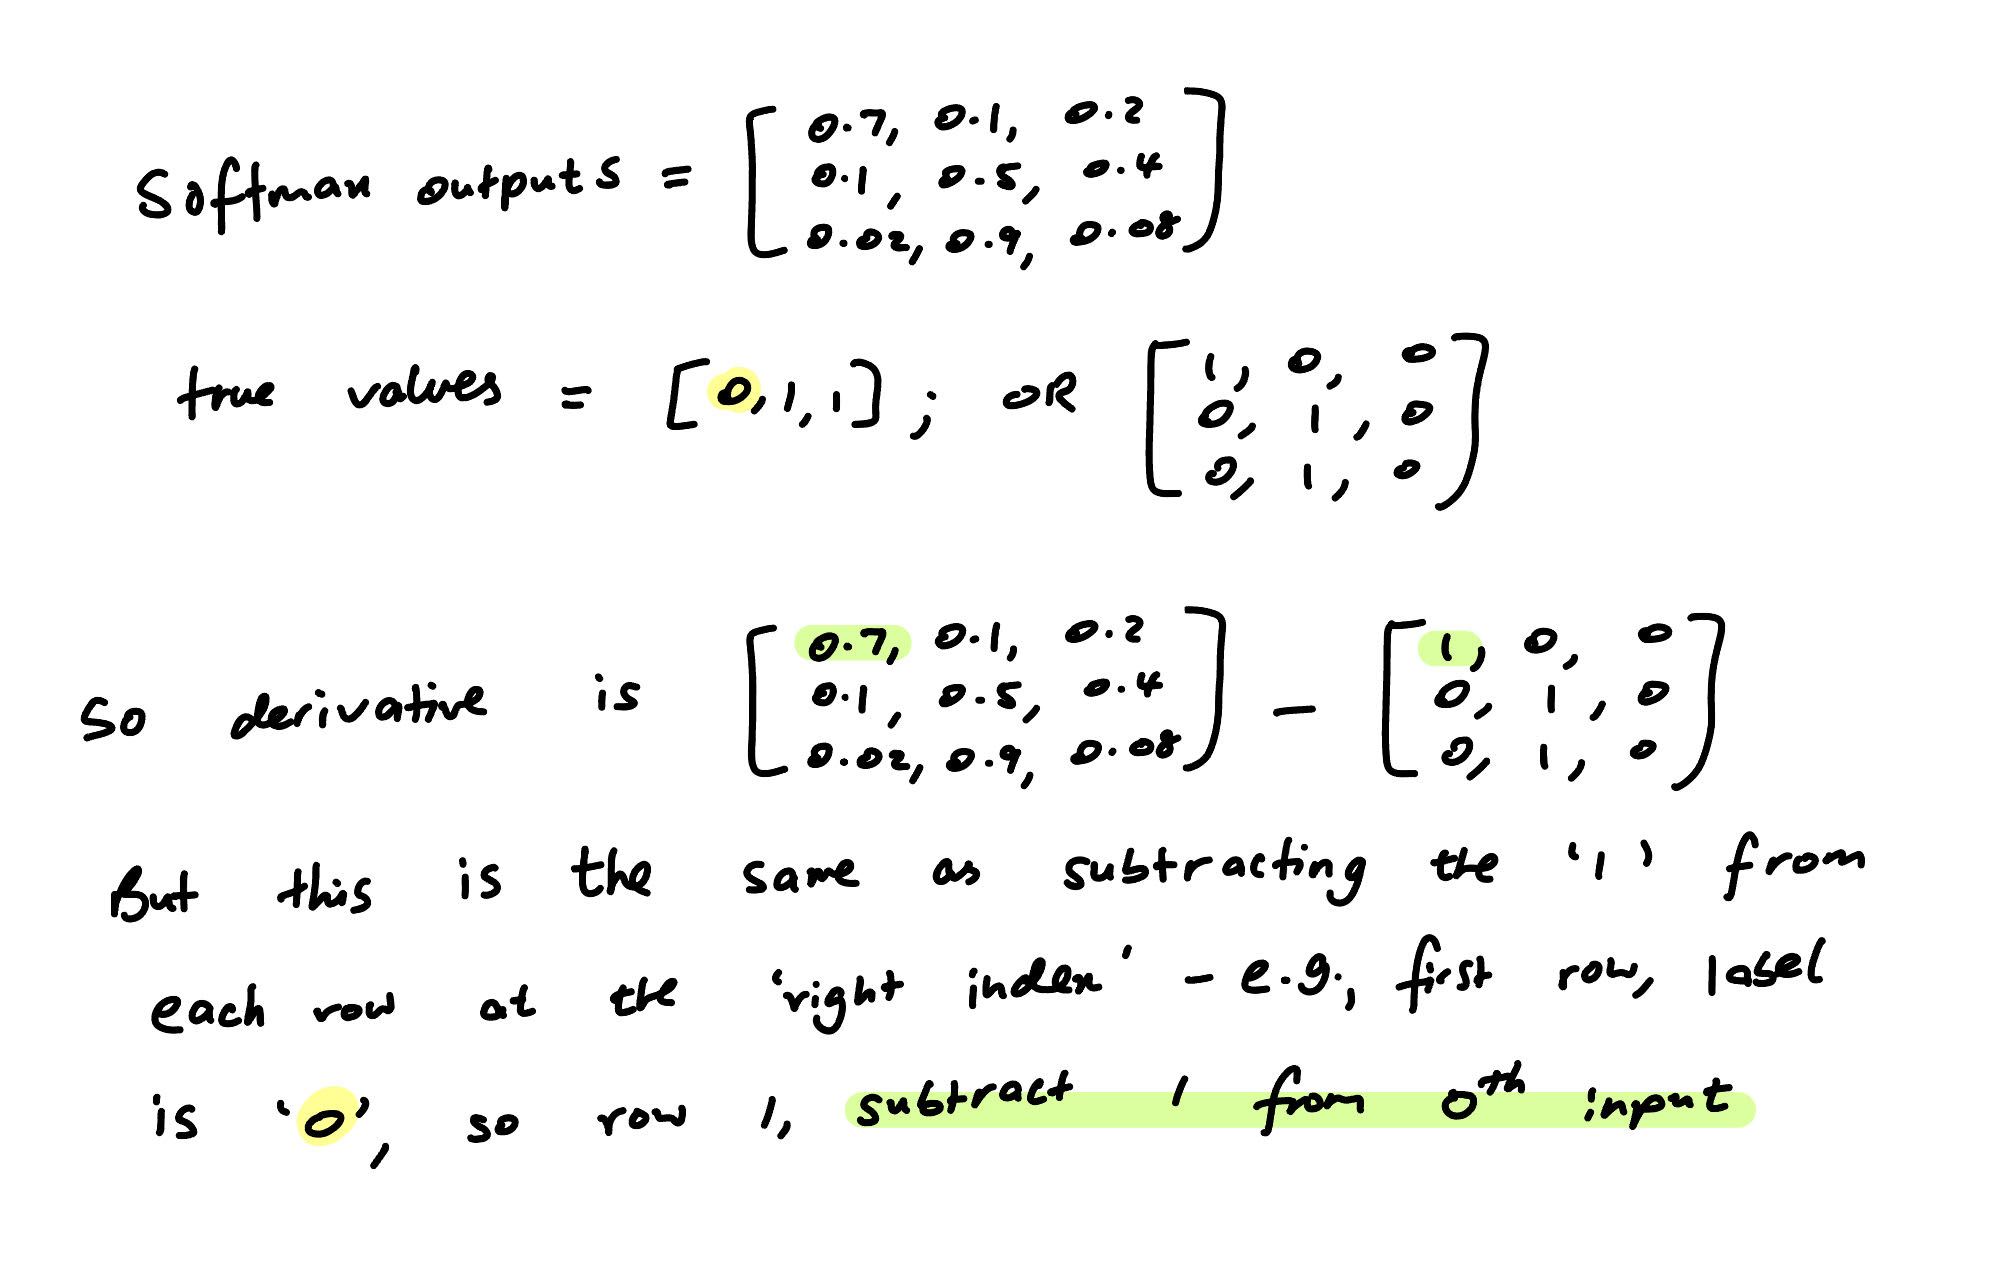

So from here it should make more sense why we're using `self.dinputs[range(samples), y_true] -= 1` - recall that nifty method of array indexing where if we put in two lists in the 'index' of the array, (so in this case, range(samples) will give us the rows, y_true will modify the column), and this willl happen one by one. I.e., the first 'edit' where we're gonna subtract 1 will be row 0, column whatever y_true label is, then it'll go for row 1, etc. 

In [74]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax() 
        self.loss = Categorical_Cross_Entropy_Loss()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs) 
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples - Although labelled dvalues, pretty sure this
        # is just going to be 'predicted' values, or 'softmax outputs'
        samples = len(dvalues) 
        
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1) 
        
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [75]:
nnfs.init()
softmax_outputs = np.array([[0.7, 0.1, 0.2],
[0.1, 0.5, 0.4],
[0.02, 0.9, 0.08]])
class_targets = np.array([0, 1, 1])
softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
softmax_loss.backward(softmax_outputs, class_targets)
dvalues1 = softmax_loss.dinputs
activation = Activation_Softmax()
activation.output = softmax_outputs
loss = Categorical_Cross_Entropy_Loss()
loss.backward(softmax_outputs, class_targets)
activation.backward(loss.dinputs)
dvalues2 = activation.dinputs
print('Gradients: combined loss and activation:')
print(dvalues1)
print('Gradients: separate loss and activation:')
print(dvalues2)

Gradients: combined loss and activation:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
Gradients: separate loss and activation:
[[-0.09999999  0.03333334  0.06666667]
 [ 0.03333334 -0.16666667  0.13333334]
 [ 0.00666667 -0.03333333  0.02666667]]


In [77]:
import numpy as np
from timeit import timeit
import nnfs
nnfs.init()
softmax_outputs = np.array([[0.7, 0.1, 0.2],
[0.1, 0.5, 0.4],
[0.02, 0.9, 0.08]])
class_targets = np.array([0, 1, 1])
def f1():
    softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
    softmax_loss.backward(softmax_outputs, class_targets)
    dvalues1 = softmax_loss.dinputs
def f2():
    activation = Activation_Softmax()
    activation.output = softmax_outputs
    loss = Categorical_Cross_Entropy_Loss()
    loss.backward(softmax_outputs, class_targets)
    activation.backward(loss.dinputs)
    dvalues2 = activation.dinputs
t1 = timeit(lambda: f1(), number=10000)
t2 = timeit(lambda: f2(), number=10000)
print(t2/t1)


6.104126484819617
